## Assignment 4

Name: Praveen Kamal

Reg No: 21BCE0468

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [11]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("./winequality-red.csv")
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Dealing with outliers

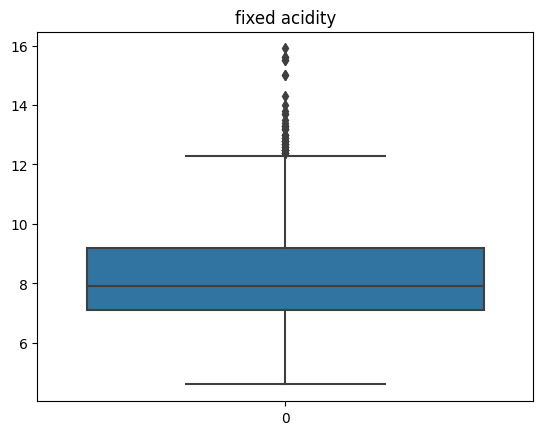

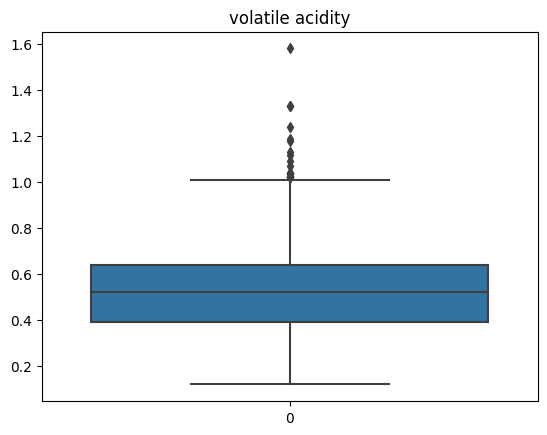

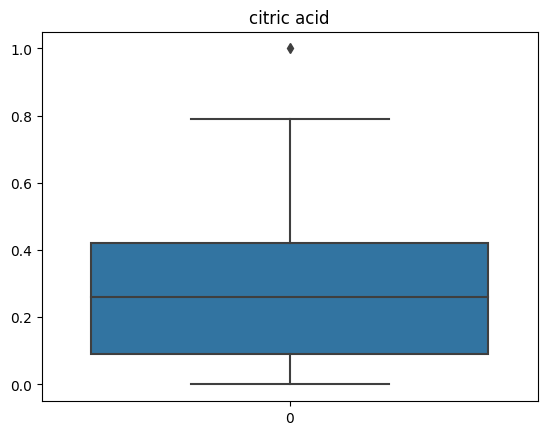

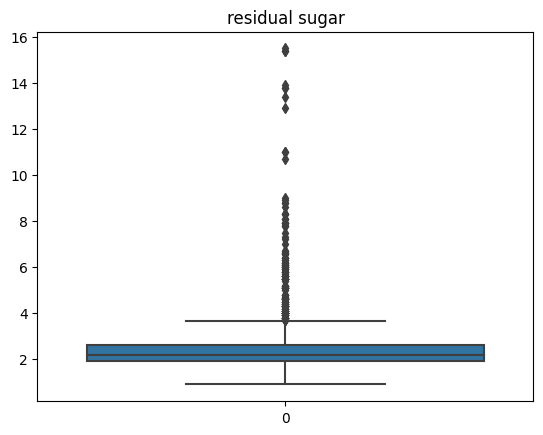

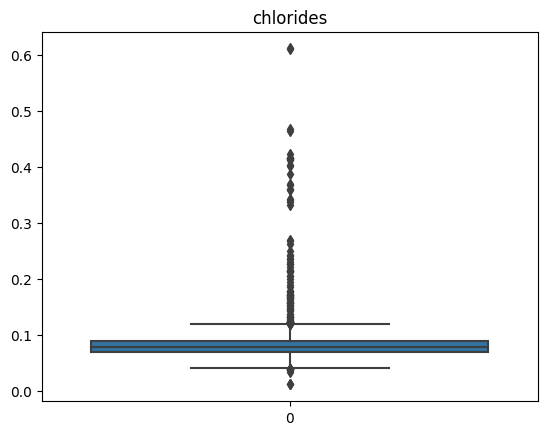

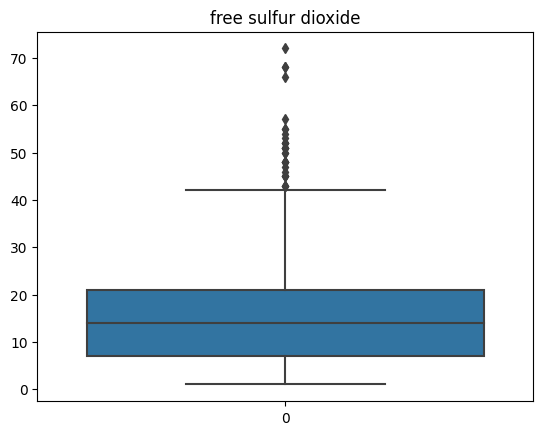

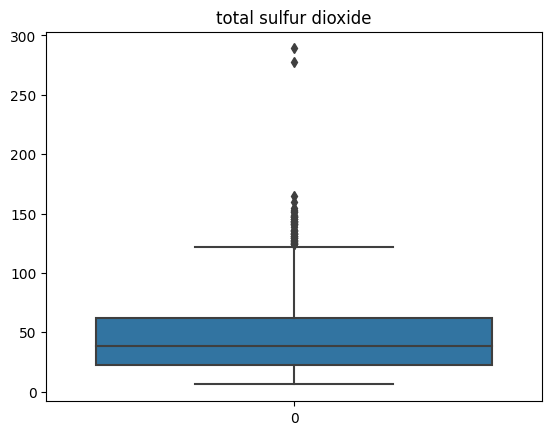

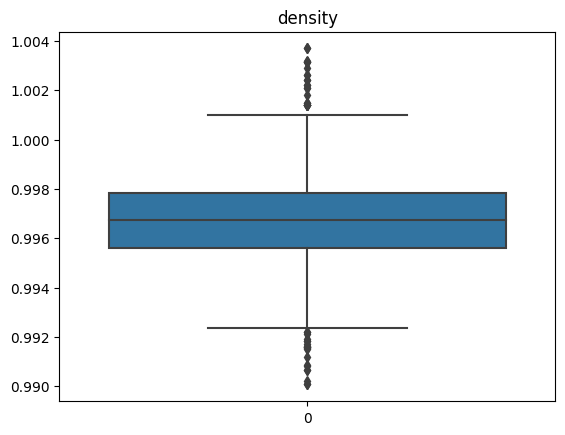

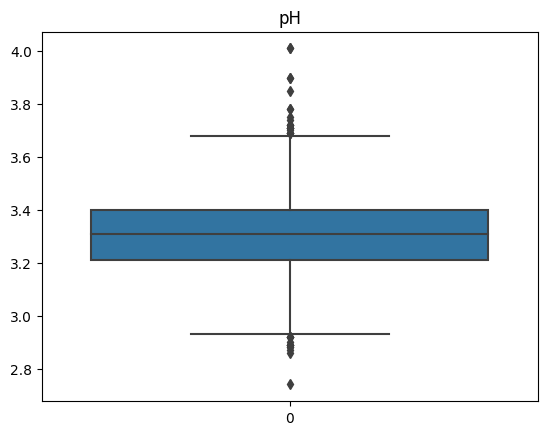

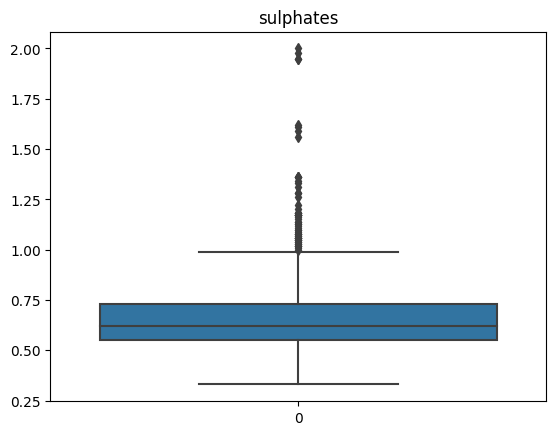

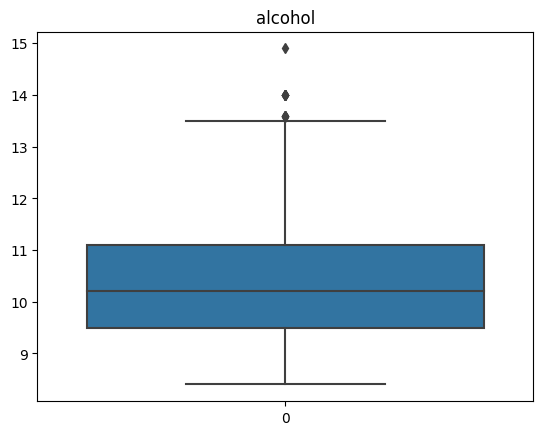

In [16]:
cols = df.iloc[:, :-1].columns
for i in cols:
    sns.boxplot(df[i])
    plt.title(f"{i}")
    plt.show()

In [56]:
df.shape

(1599, 12)

Removing outliers

In [17]:
for i in cols:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    df[i] = np.where(df[i] > upper_limit, upper_limit, df[i])
    df[i] = np.where(df[i] < lower_limit, lower_limit, df[i])

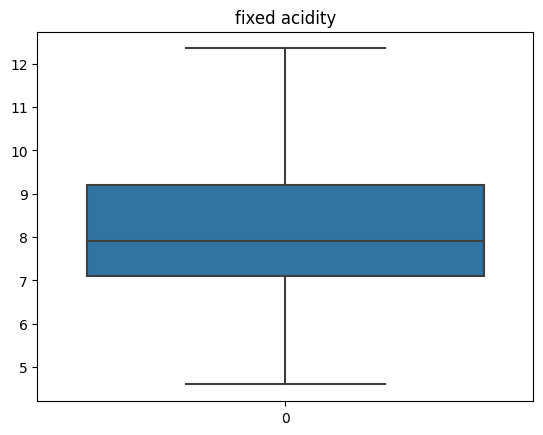

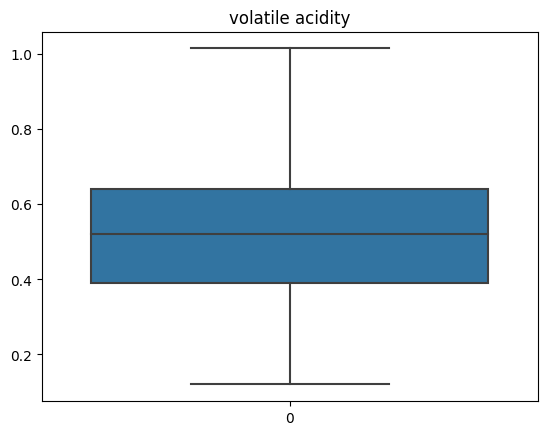

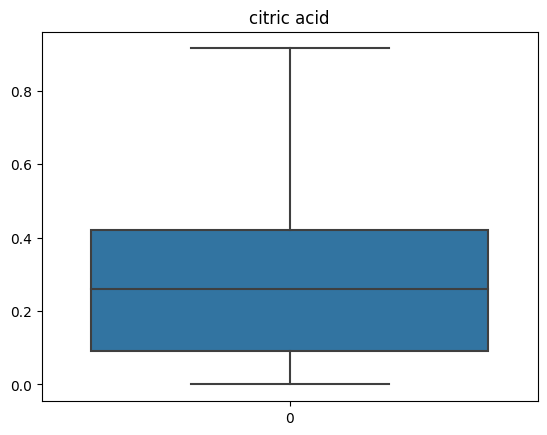

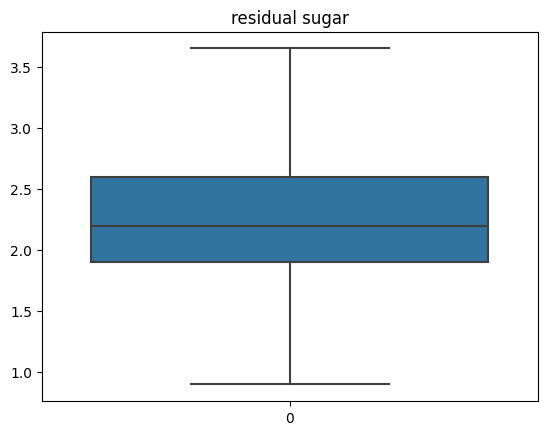

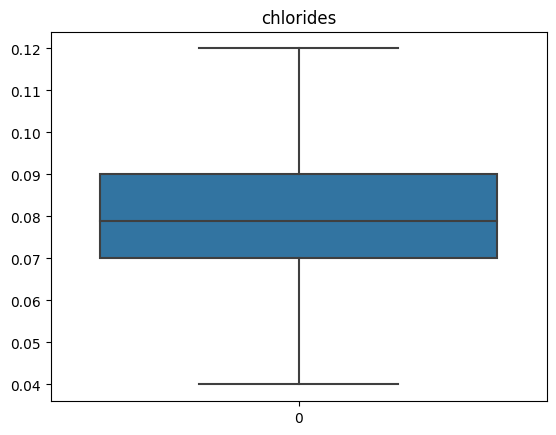

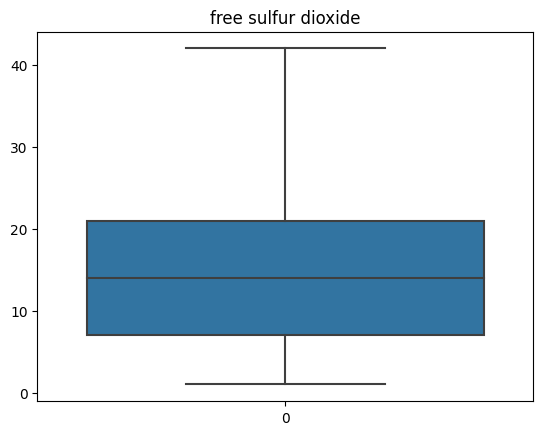

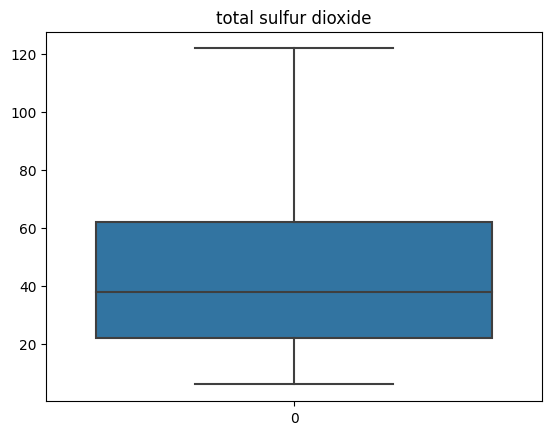

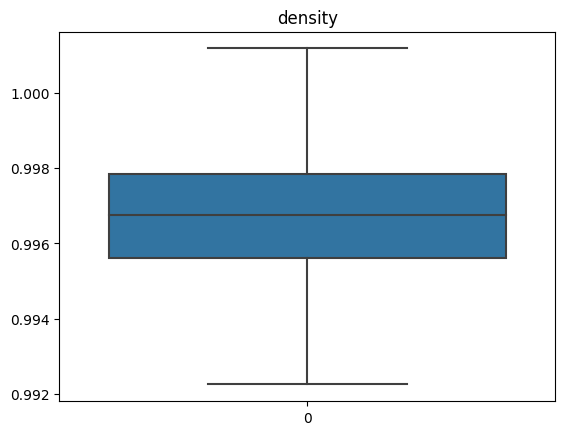

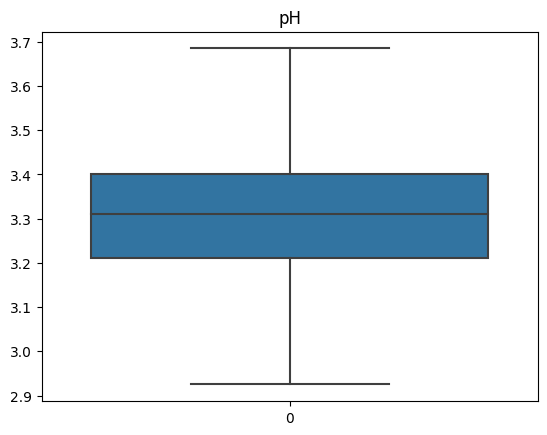

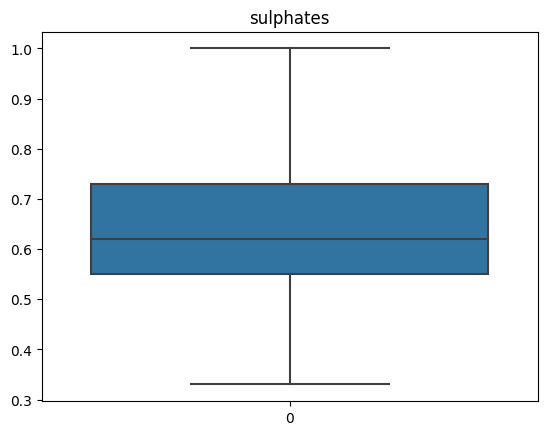

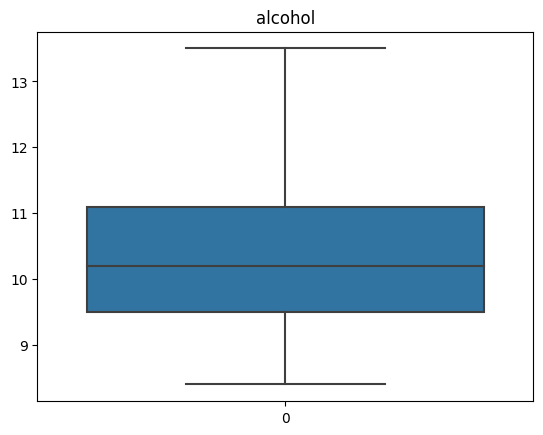

In [19]:
for i in cols:
    sns.boxplot(df[i])
    plt.title(f"{i}")
    plt.show()

### Data visualisation

Univariate analysis

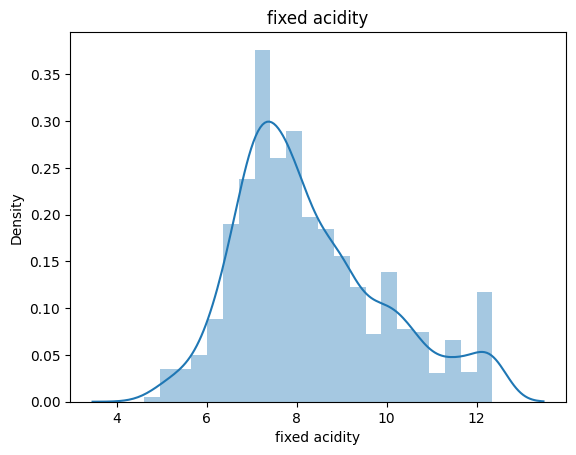

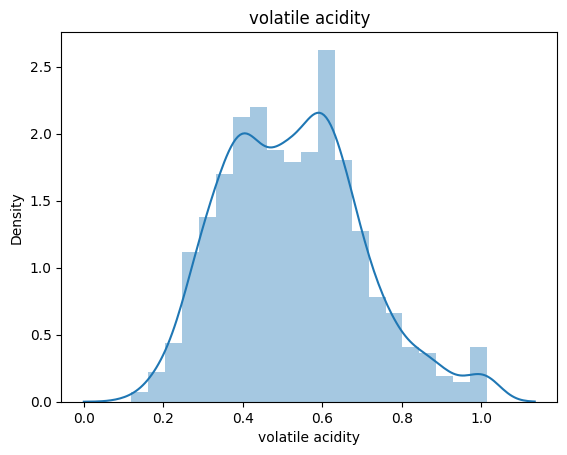

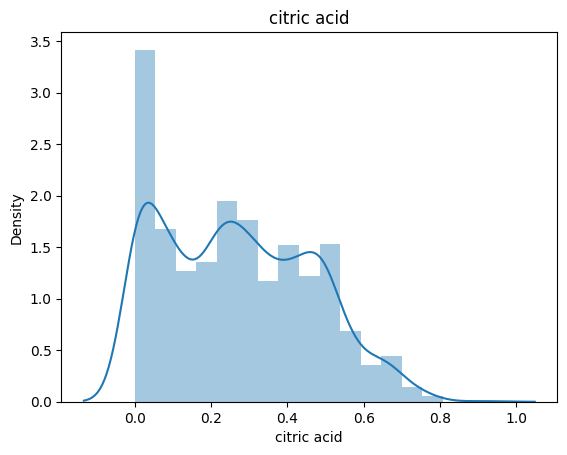

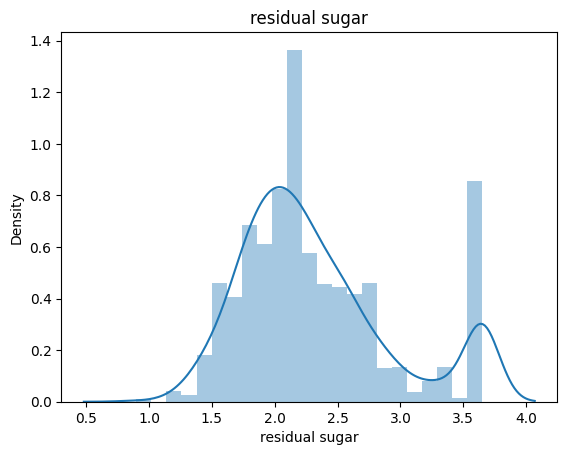

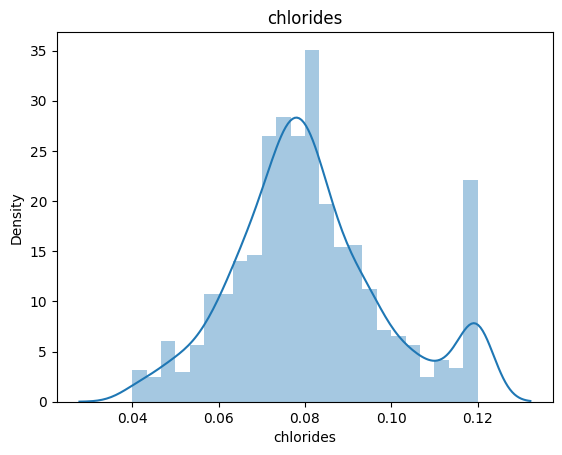

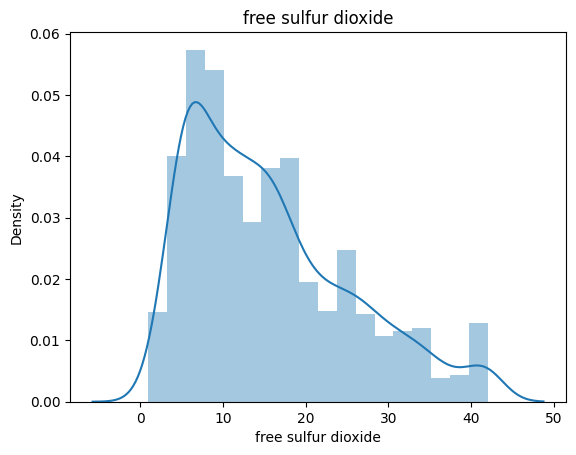

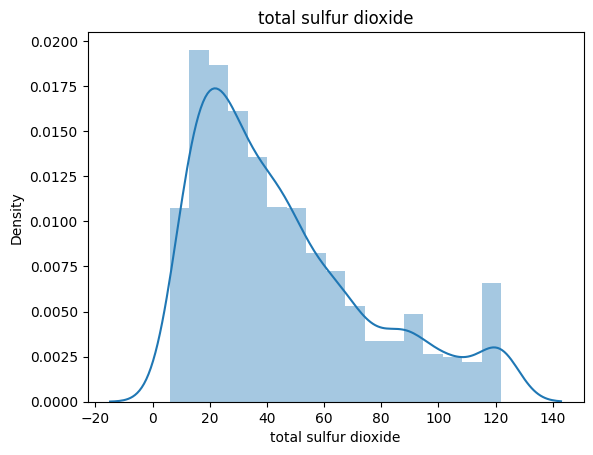

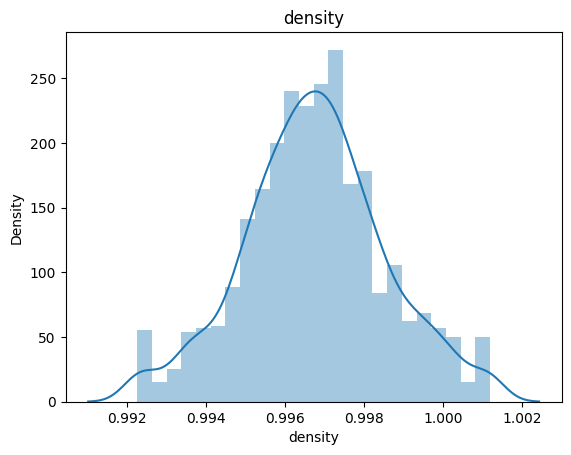

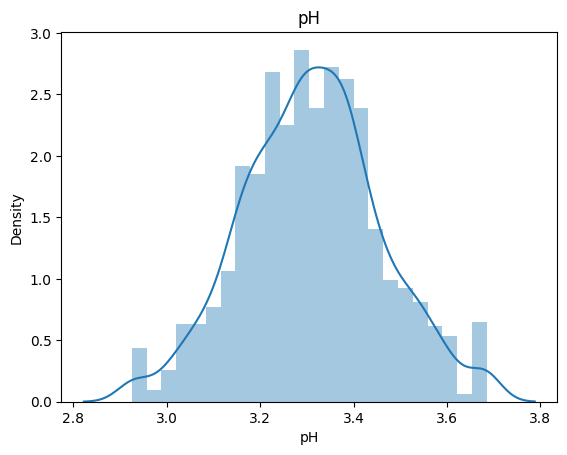

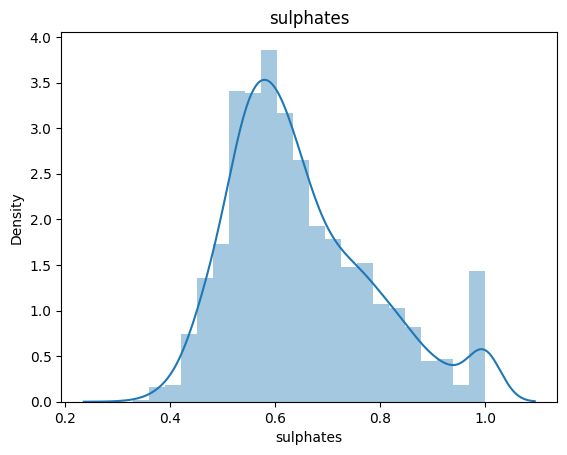

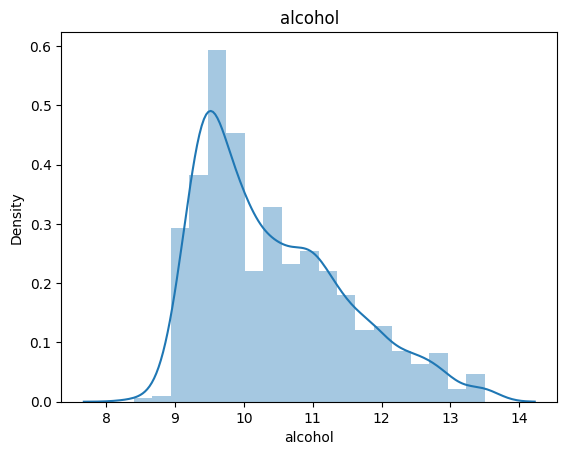

In [22]:
for i in cols:
    sns.distplot(df[i])
    plt.title(f"{i}") 
    plt.show()

Bivariate analysis

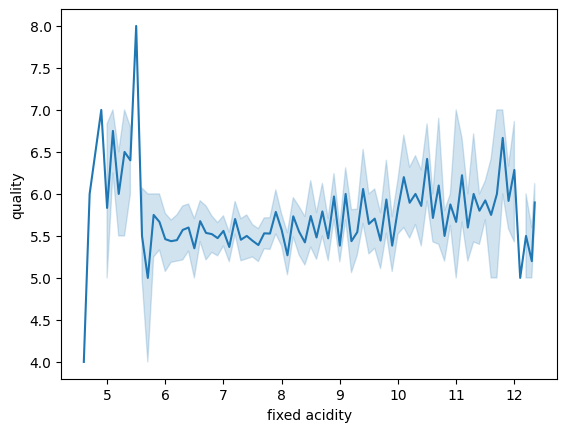

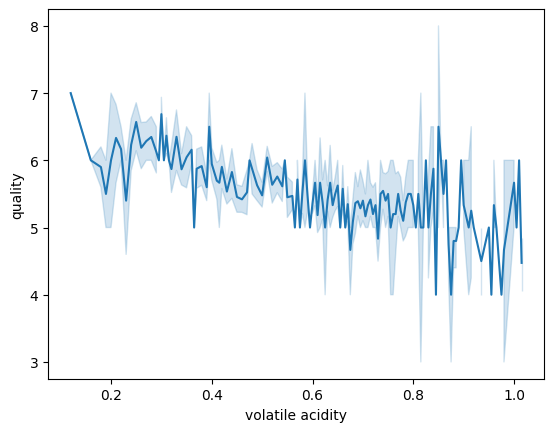

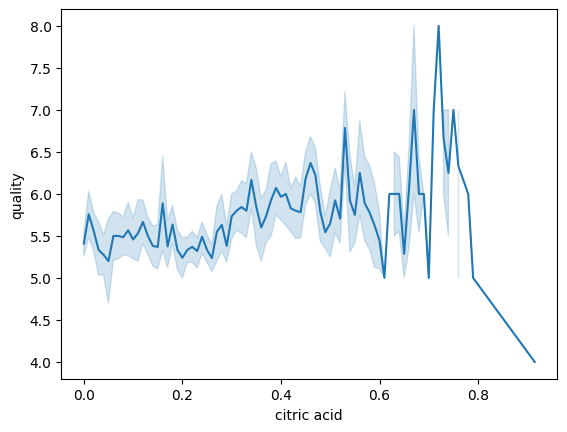

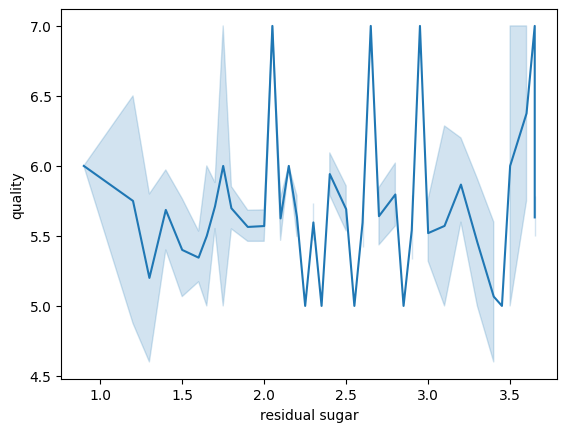

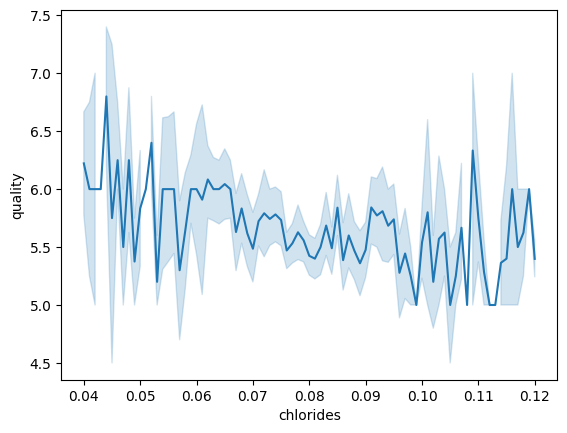

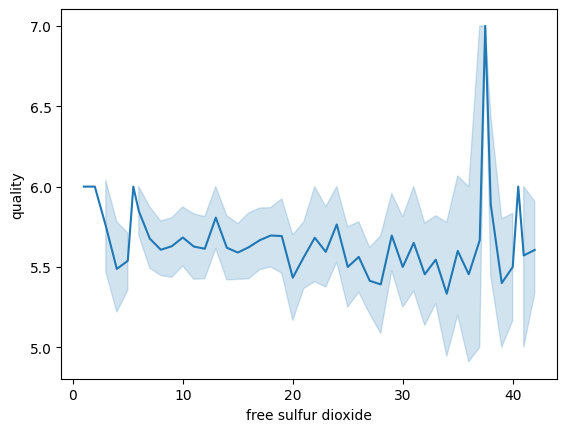

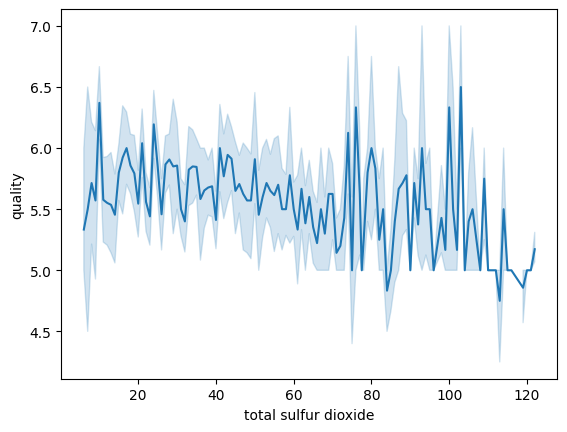

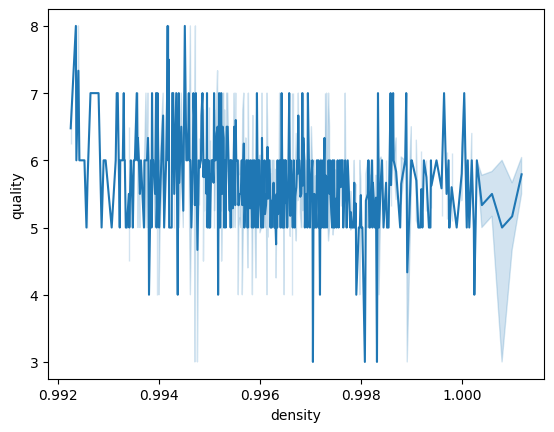

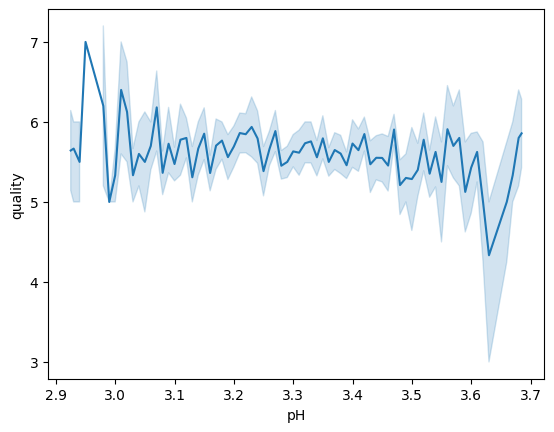

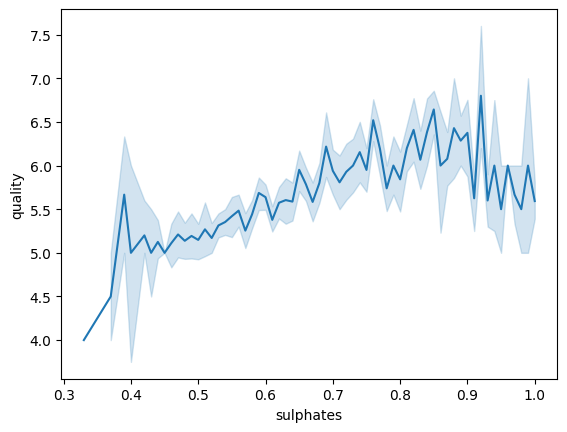

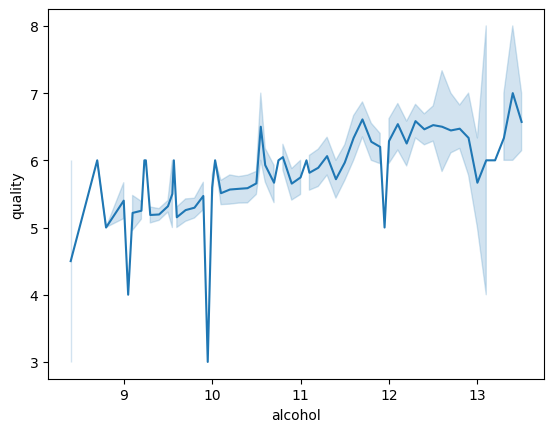

In [26]:
for i in cols:
    sns.lineplot(x=df[i], y=df["quality"])
    plt.show()

Multivariate analysis

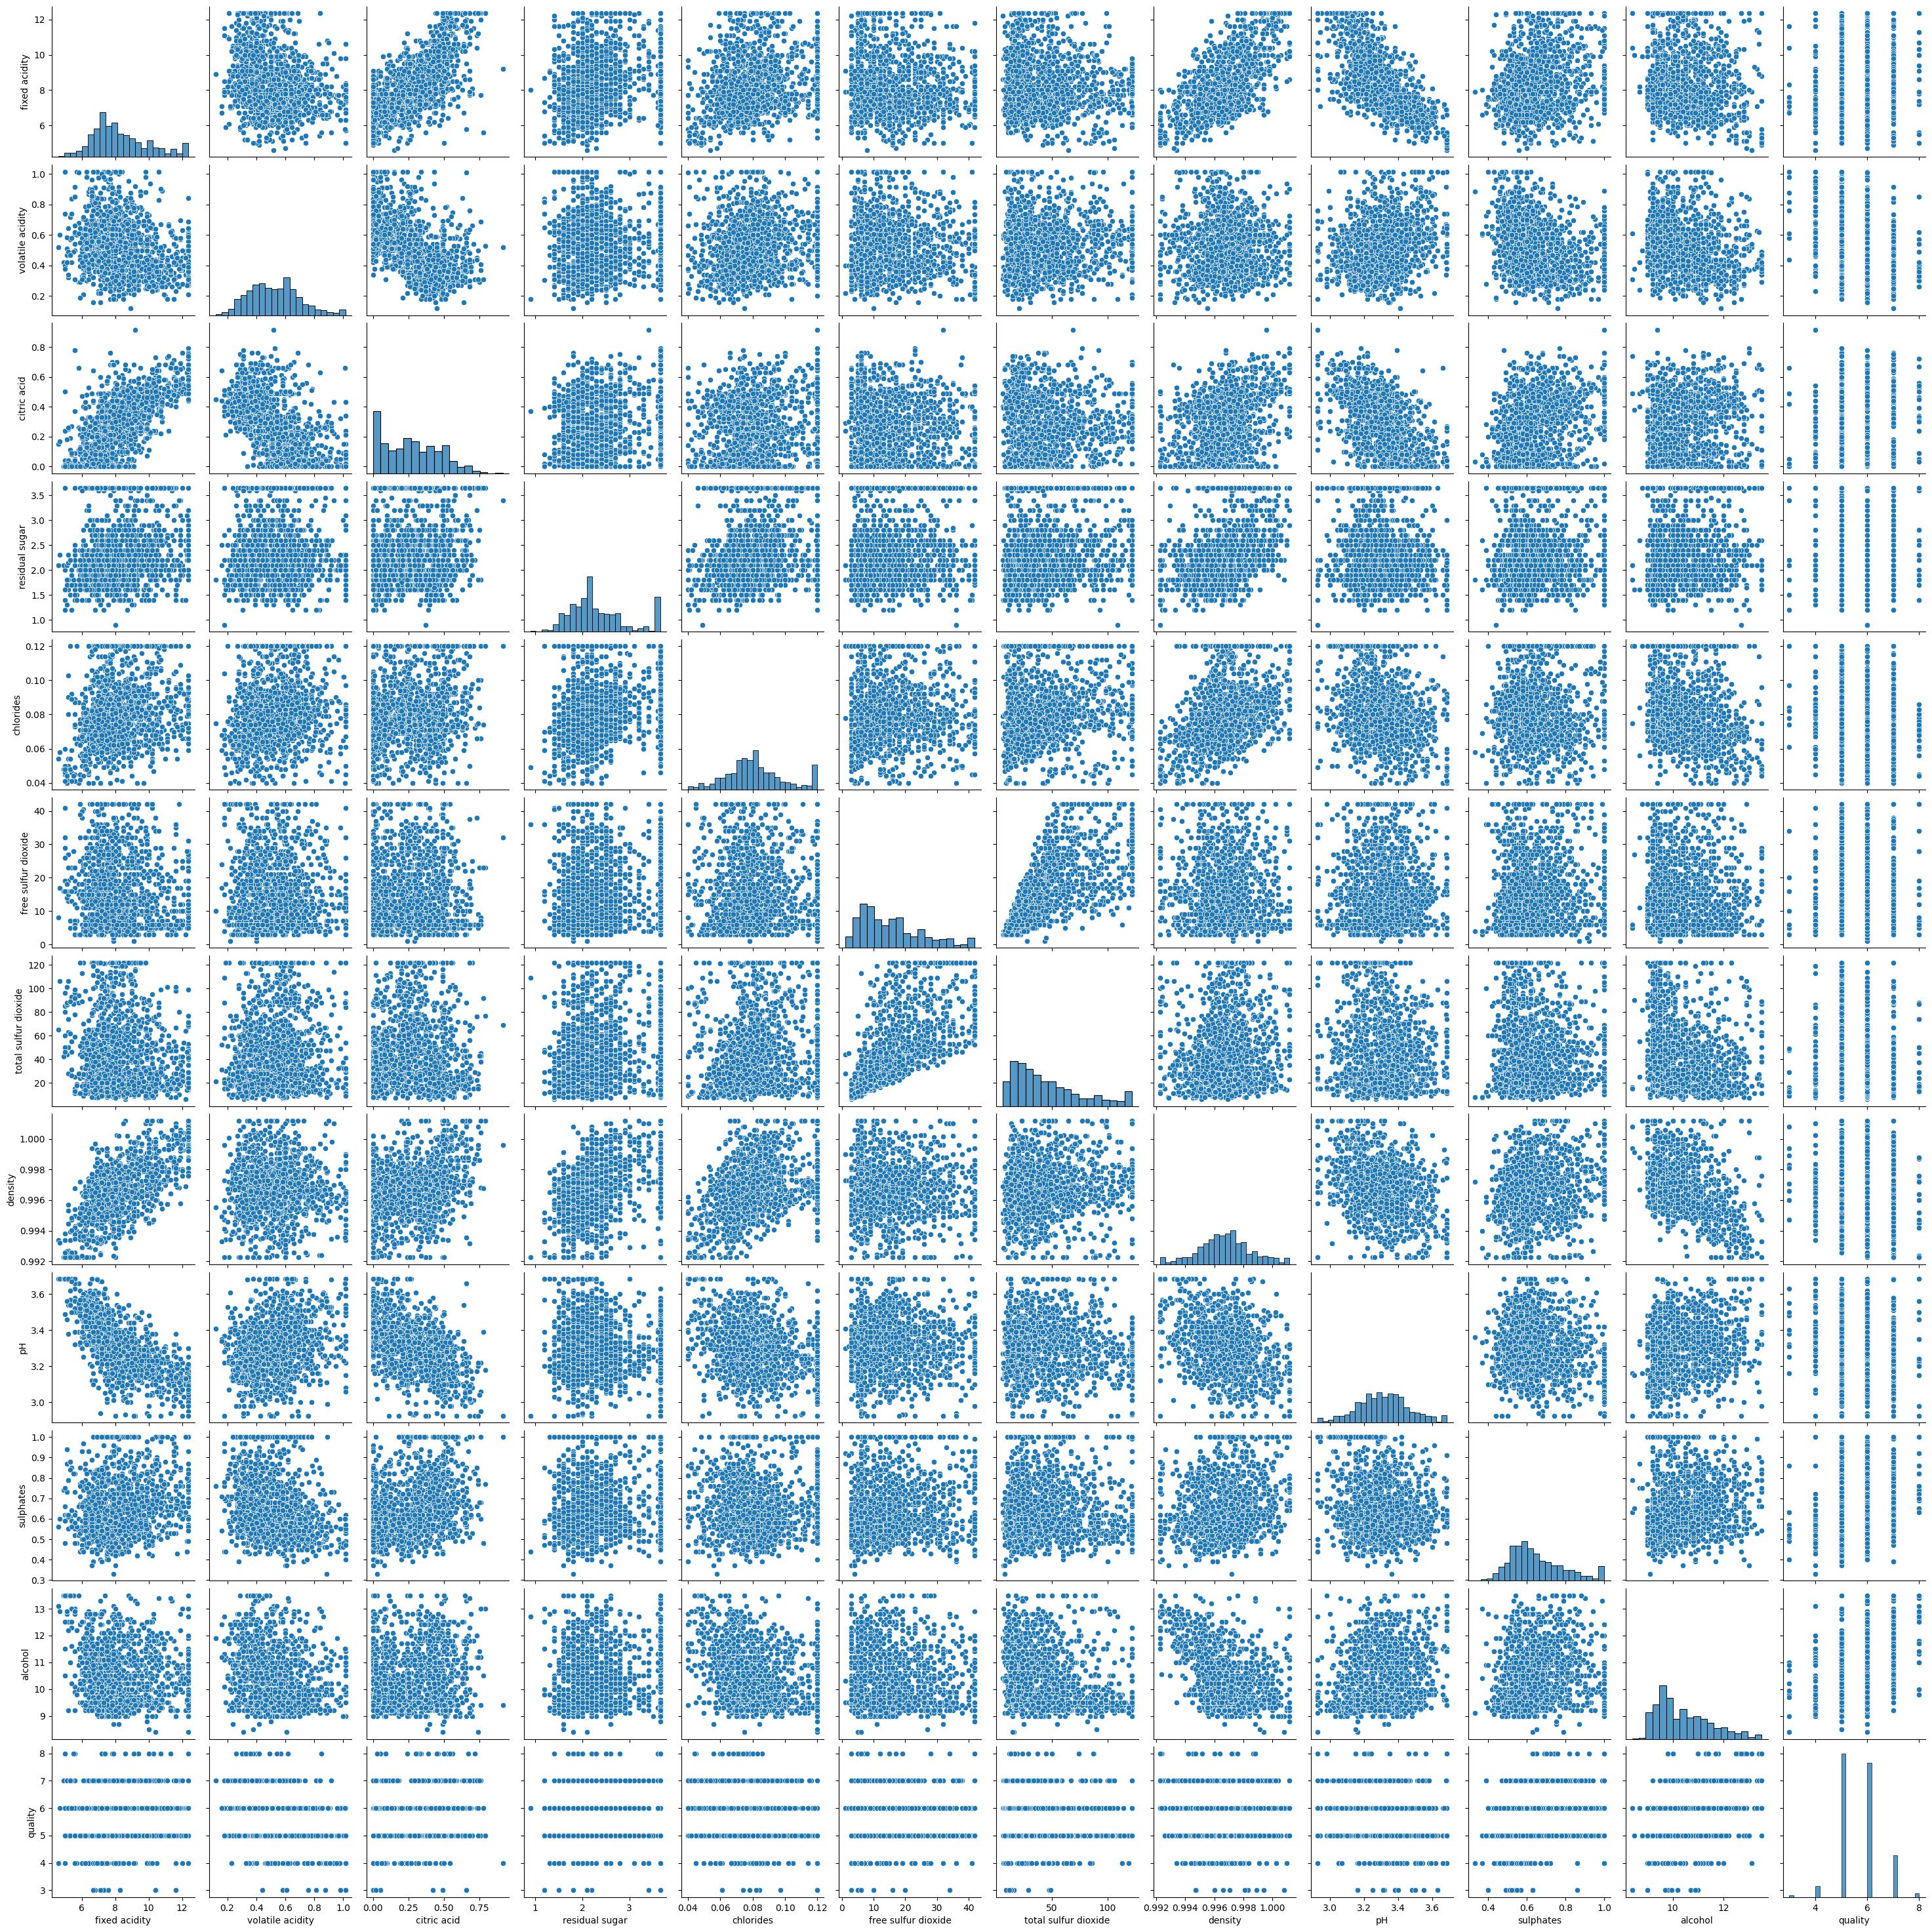

In [27]:
sns.pairplot(df)

<Axes: >

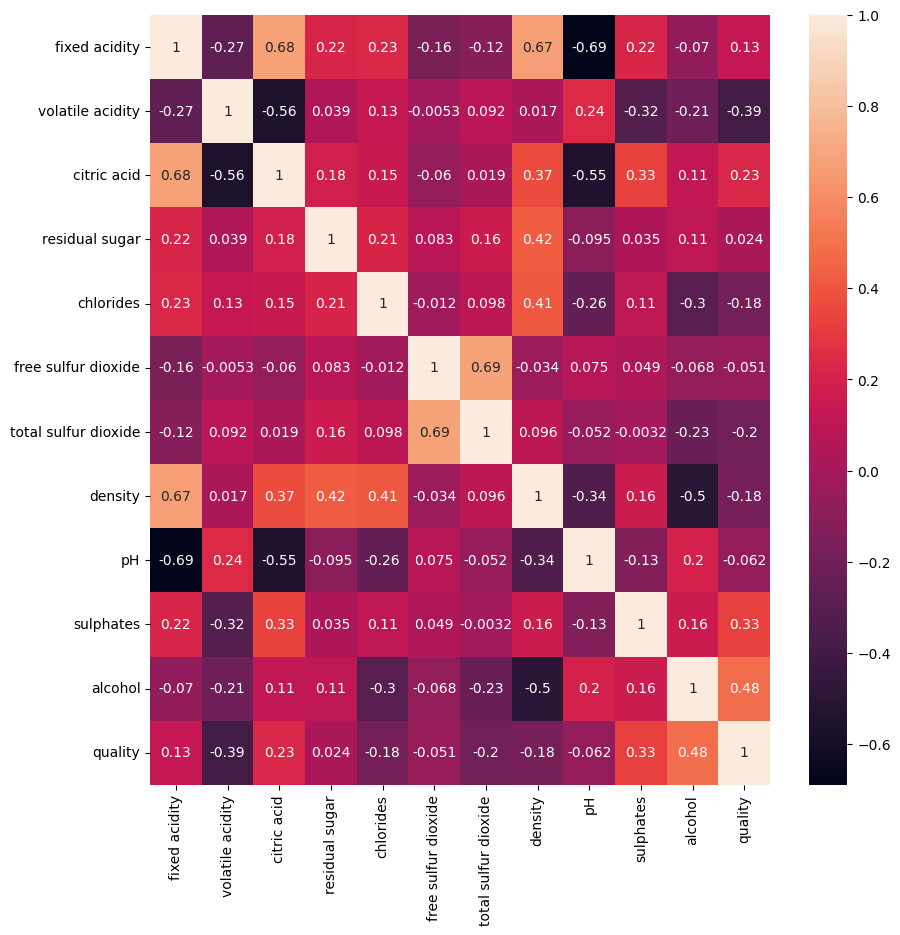

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

In [31]:
df.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.478556
sulphates               0.328710
citric acid             0.227144
fixed acidity           0.125442
residual sugar          0.023790
free sulfur dioxide    -0.050641
pH                     -0.061507
density                -0.176330
chlorides              -0.183037
total sulfur dioxide   -0.201542
volatile acidity       -0.387608
Name: quality, dtype: float64

In [32]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

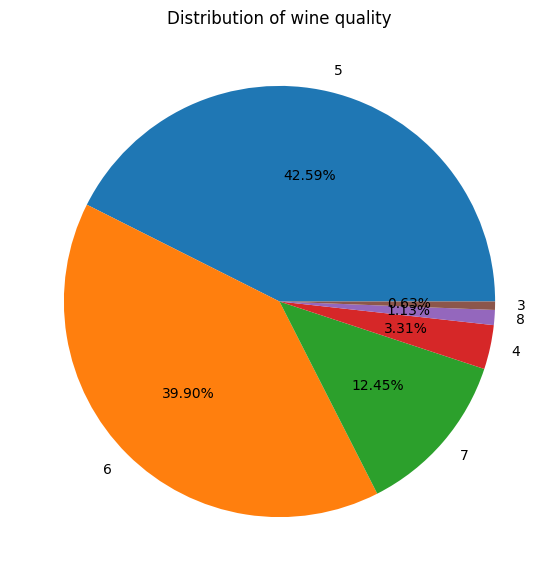

In [44]:
plt.figure(figsize=(7, 7))
plt.title("Distribution of wine quality")
plt.pie(df.quality.value_counts(), labels=df.quality.value_counts().index, autopct="%.2f%%")
plt.show()

Data is imbalanced

### Splitting data

In [46]:
x = df.drop(columns=["quality"], axis=1)
y = df.quality

### Scaling data

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.538197          0.997591    -1.392540       -0.693182  -0.291550   
1      -0.296555          2.032132    -1.392540        0.455672   0.943237   
2      -0.296555          1.342438    -1.186940       -0.036694   0.606477   
3       1.757401         -1.416339     1.485857       -0.693182  -0.347676   
4      -0.538197          0.997591    -1.392540       -0.693182  -0.291550   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.476813             -0.385806  0.585705  1.332717  -0.655496   
1             0.946759              0.700988  0.031853 -0.736650   0.220142   
2            -0.070078              0.272857  0.142624 -0.336128   0.001232   
3             0.133289              0.470456  0.696475 -1.003665  -0.509557   
4            -0.476813             -0.385806  0.585705  1.332717  -0.655496   

    alcohol  
0 -0.966950  
1 -0.587615  
2 -0.587615  
3 -0.587615  
4 -0.966950

### Splitting data into train and test data

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1279, 11)
(320, 11)
(1279,)
(320,)


### Balancing data

In [51]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [52]:
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [54]:
y_train.value_counts()

quality
5    551
6    506
7    157
4     43
8     13
3      9
Name: count, dtype: int64

In [55]:
y_train_smote.value_counts()

quality
6    551
5    551
4    551
7    551
8    551
3    551
Name: count, dtype: int64

In [57]:
x_train_smote.shape

(3306, 11)

In [58]:
y_train_smote.shape

(3306,)

### Model building

In [59]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

In [63]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train_smote)

### Evaluating the model

In [69]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_pred, y_test)

0.625

In [70]:
accuracy_score(y_pred_train, y_train_smote)

1.0

In [71]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.40      0.20      0.27        20
           5       0.67      0.73      0.70       119
           6       0.61      0.64      0.63       127
           7       0.67      0.57      0.62        49
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.39      0.36      0.37       320
weighted avg       0.62      0.62      0.62       320



Testing with random observation

In [77]:
df.sample()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
349            9.1             0.785          0.0             2.6      0.093   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
349                 11.0                  28.0   0.9994  3.36       0.86   

     alcohol  quality  
349      9.4        6

In [78]:
model.predict([[9.1, 0.785, 0.0, 2.6, 0.093, 11.0, 28.0, 0.9994, 3.36, 0.86, 9.4]])

array([6])